In [1]:
import pandas as pd
import csv

# Re-arrange the Dataset

In [3]:
df = pd.read_csv("page-blocks.data",sep=",",header=None)

column = ['height', 'length', 'area', 'eccen', 'p_black', 'p_and', 'mean_tr', 'blackpix', 'blackand', 'wb_trans','target']
df

,0
0,5 7 35 1.400 .400 .657 2.33 ...
1,6 7 42 1.167 .429 .881 3.60 ...
2,6 18 108 3.000 .287 .741 4.43 ...
3,5 7 35 1.400 .371 .743 4.33 ...
4,6 3 18 .500 .500 .944 2.25 ...
...,...
5468,4 524 2096 131.00 .542 .603 40.57 11...
5469,7 4 28 .571 .714 .929 10.00 ...
5470,6 95 570 15.833 .300 .911 1.64 1...
5471,7 41 287 5.857 .213 .801 1.36 ...


In [4]:

a = df.iloc[:,0].str.split(expand=True)
a


,0,1,2,3,4,5,6,7,8,9,10
0,5,7,35,1.400,.400,.657,2.33,14,23,6,1
1,6,7,42,1.167,.429,.881,3.60,18,37,5,1
2,6,18,108,3.000,.287,.741,4.43,31,80,7,1
3,5,7,35,1.400,.371,.743,4.33,13,26,3,1
4,6,3,18,.500,.500,.944,2.25,9,17,4,1
...,...,...,...,...,...,...,...,...,...,...,...
5468,4,524,2096,131.00,.542,.603,40.57,1136,1264,28,2
5469,7,4,28,.571,.714,.929,10.00,20,26,2,1
5470,6,95,570,15.833,.300,.911,1.64,171,519,104,1
5471,7,41,287,5.857,.213,.801,1.36,61,230,45,1


In [5]:
a.columns = column
a

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,target
0,5,7,35,1.400,.400,.657,2.33,14,23,6,1
1,6,7,42,1.167,.429,.881,3.60,18,37,5,1
2,6,18,108,3.000,.287,.741,4.43,31,80,7,1
3,5,7,35,1.400,.371,.743,4.33,13,26,3,1
4,6,3,18,.500,.500,.944,2.25,9,17,4,1
...,...,...,...,...,...,...,...,...,...,...,...
5468,4,524,2096,131.00,.542,.603,40.57,1136,1264,28,2
5469,7,4,28,.571,.714,.929,10.00,20,26,2,1
5470,6,95,570,15.833,.300,.911,1.64,171,519,104,1
5471,7,41,287,5.857,.213,.801,1.36,61,230,45,1


In [6]:
a.to_csv(r"finaldataset.csv", index =False)

height:   integer.         | Height of the block.
   lenght:   integer.     | Length of the block. 
   area:     integer.    | Area of the block (height * lenght);
   eccen:    continuous.  | Eccentricity of the block (lenght / height);
   p_black:  continuous.  | Percentage of black pixels within the block (blackpix / area);
   p_and:    continuous.        | Percentage of black pixels after the application of the Run Length Smoothing Algorithm (RLSA) (blackand / area);
   mean_tr:  continuous.      | Mean number of white-black transitions (blackpix / wb_trans);
   blackpix: integer.    | Total number of black pixels in the original bitmap of the block.
   blackand: integer.        | Total number of black pixels in the bitmap of the block after the RLSA.
   wb_trans: integer.          | Number of white-black transitions in the original bitmap of the block.

# Dataviz

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.tools as tls




%matplotlib inline

In [7]:
dataset = pd.read_csv("finaldataset.csv")
dataset

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,target
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1
...,...,...,...,...,...,...,...,...,...,...,...
5468,4,524,2096,131.000,0.542,0.603,40.57,1136,1264,28,2
5469,7,4,28,0.571,0.714,0.929,10.00,20,26,2,1
5470,6,95,570,15.833,0.300,0.911,1.64,171,519,104,1
5471,7,41,287,5.857,0.213,0.801,1.36,61,230,45,1


In [ ]:
print(dataset.target.min())
print(dataset.target.max())

1
5


We have 5 classes.

In [ ]:
print(pd.isnull(dataset))
for column in dataset.columns:
    print('NaN' in dataset[column])

      height  length   area  eccen  ...  blackpix  blackand  wb_trans  target
0      False   False  False  False  ...     False     False     False   False
1      False   False  False  False  ...     False     False     False   False
2      False   False  False  False  ...     False     False     False   False
3      False   False  False  False  ...     False     False     False   False
4      False   False  False  False  ...     False     False     False   False
...      ...     ...    ...    ...  ...       ...       ...       ...     ...
5468   False   False  False  False  ...     False     False     False   False
5469   False   False  False  False  ...     False     False     False   False
5470   False   False  False  False  ...     False     False     False   False
5471   False   False  False  False  ...     False     False     False   False
5472   False   False  False  False  ...     False     False     False   False

[5473 rows x 11 columns]
False
False
False
False
False
False
Fa

The dataset does not seem to have missing values

In [ ]:
dataset['target'].value_counts()


1    4913
2     329
5     115
4      88
3      28
Name: target, dtype: int64

In [ ]:
print(str(4913/sum(dataset['target'].value_counts())))

0.8976795176320117


Text(0, 0.5, 'Count')

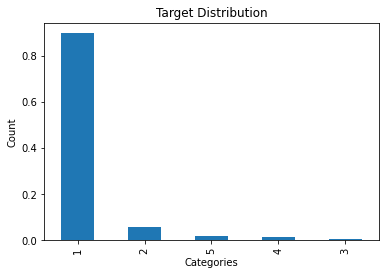

In [ ]:
dataset.target.value_counts(normalize=True).plot(kind= 'bar', title ="Target Distribution")
plt.xlabel('Categories')
plt.ylabel('Count')

Comments: 90% of the blocks belong to the first class. The 5th and 4th category are almost the same.

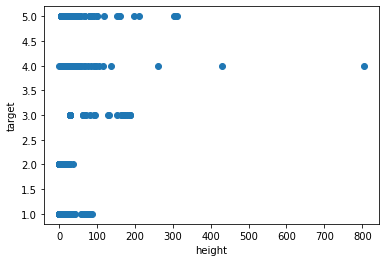

In [ ]:
plt.scatter(dataset.height,dataset.target)
sb.set
plt.xlabel("height")
plt.ylabel("target")
plt.show()

we can see that the target values are mainly between 0 and 300 of height. the 4th category had few observations out of this range, this can be interpreted as some specific case. 

## Distributions of the variables

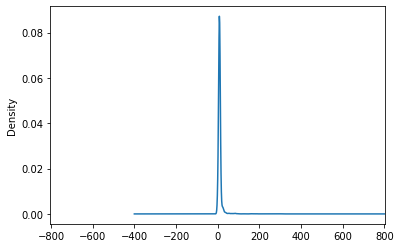

In [ ]:
dataset.height.plot(kind="density",xlim=(-dataset.height.max(),dataset.height.max()))

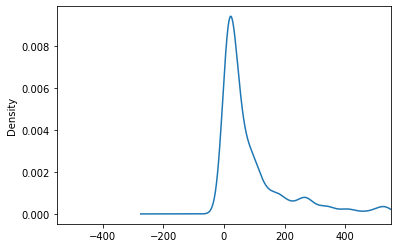

In [ ]:
dataset.length.plot(kind="density",xlim=(-dataset.length.max(),dataset.length.max()))

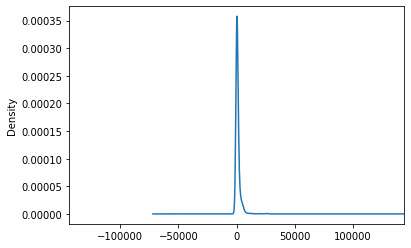

In [ ]:
dataset.area.plot(kind="density",xlim=(-dataset.area.max(),dataset.area.max()))

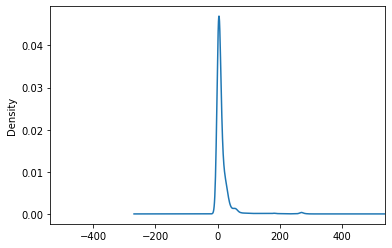

In [ ]:
dataset.eccen.plot(kind="density",xlim=(-dataset.eccen.max(),dataset.eccen.max()))

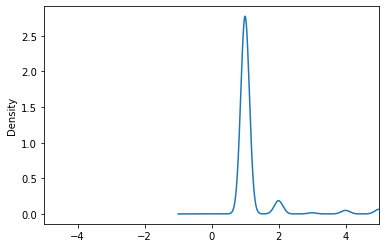

In [ ]:
dataset.target.plot(kind="density",xlim=(-dataset.target.max(),dataset.target.max()))

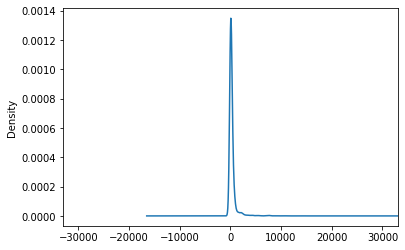

In [ ]:
dataset.blackpix.plot(kind="density",xlim=(-dataset.blackpix.max(),dataset.blackpix.max()))

We have centred rather gaussian variables (linear discriminant analysis can be used)

## Correlation heatmap

In [ ]:
correlation = dataset.corr() #pearson = linear correlation
correlation.sort_values(["target"])
correlation.target


height      0.351032
length     -0.004540
area        0.234254
eccen       0.099196
p_black     0.212936
p_and      -0.177085
mean_tr     0.072344
blackpix    0.165633
blackand    0.156506
wb_trans    0.033749
target      1.000000
Name: target, dtype: float64

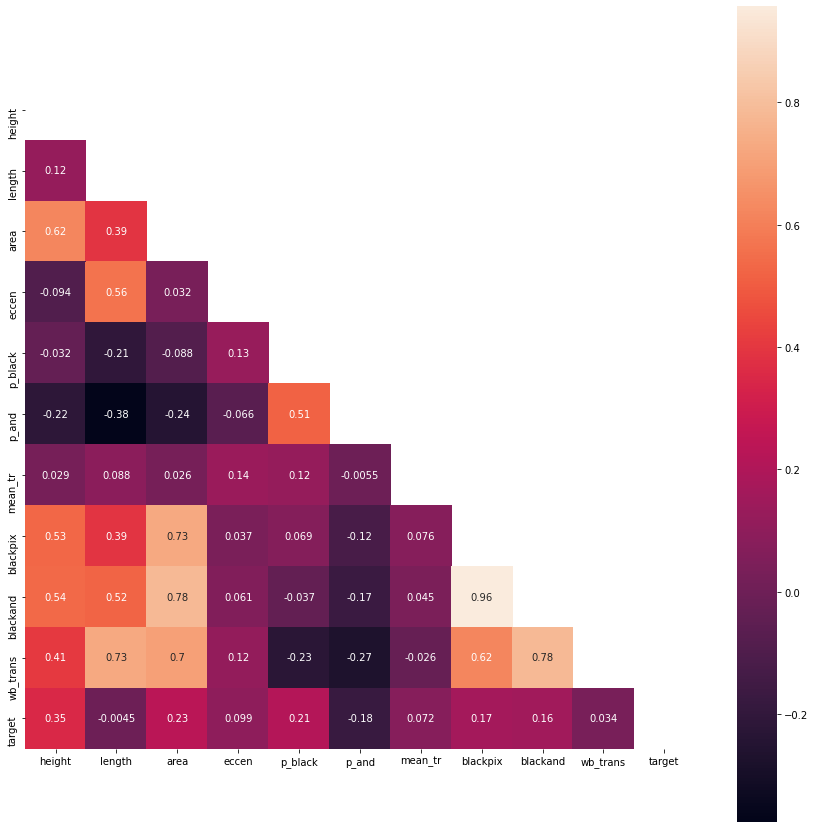

In [ ]:

#plotting a heatmap for to the correlation
plt.figure(figsize=(15,15))
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(correlation, annot=True, square = True, mask = mask)

the highest correlation is blackand and blackpix (0.96) => In other words, the total number of black pixels in the original bitmap of the block and after the RLSA are highly related 

the height is the most important factor to determine the target.

# Machine Learning


As we have a target with some discrete values only, we conclude that we are facing a supervised classification problem.

So we can try three different types of machine learning methods:

-Logistic Regression but we are not in a binary case, so it does not seem appropriate
-Discriminant Analysis
-Classification trees

We can also try unsupervised classification models, such as knn which is a clustering algorithm.

## Pre-processing

We scale our data to reduce the effect of the differences between variables (a lot of them are centred but do not have to same scale of values). We can see that with the scale of our x axes for our different distributions of variables.

In [8]:
from sklearn import preprocessing
#saving the target variable and dropping it from the entire dataset
y = dataset['target']
X= dataset.drop("target", axis = 1)
#normalize the data
x = X.values
scaler = preprocessing.MinMaxScaler()
#this scaler prevents the dataset from distortion
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
X.columns = ['height', 'length', 'area', 'eccen', 'p_black', 'p_and', 'mean_tr', 'blackpix', 'blackand', 'wb_trans']
X


,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
0,0.004981,0.010870,0.000194,0.002594,0.367089,0.634328,0.000268,0.000212,0.000347,0.001557
1,0.006227,0.010870,0.000243,0.002160,0.397679,0.873134,0.000525,0.000333,0.000650,0.001246
2,0.006227,0.030797,0.000701,0.005574,0.247890,0.723881,0.000692,0.000727,0.001583,0.001869
3,0.004981,0.010870,0.000194,0.002594,0.336498,0.726013,0.000672,0.000182,0.000412,0.000623
4,0.006227,0.003623,0.000076,0.000918,0.472574,0.940299,0.000252,0.000061,0.000217,0.000934
...,...,...,...,...,...,...,...,...,...,...
5468,0.003736,0.947464,0.014508,0.243938,0.516878,0.576759,0.007987,0.034202,0.027251,0.008409
5469,0.007472,0.005435,0.000146,0.001050,0.698312,0.924307,0.001817,0.000394,0.000412,0.000311
5470,0.006227,0.170290,0.003910,0.029472,0.261603,0.905117,0.000129,0.004968,0.011100,0.032077
5471,0.007472,0.072464,0.001945,0.010894,0.169831,0.787846,0.000073,0.001636,0.004835,0.013703


In [12]:
#splitting the dataset into train and test sets 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,random_state=1)

## Linear Discriminant Analysis 

We choose it over logistic regression as a classification technique because we have more than two classes. Also, it permits to have stable parameter estimates, even with well-separated classes.

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
y_pred = lda.predict(X_test)
print(accuracy_score(y_test, y_pred))
#OR lda.score(X_test,y_test)

0.9464068209500609


We seem to have around 94% of accuracy with this model. But we do not forget that 90% of the dataset is in the same class, so it has an influence on this result. So, the accuracy is not a sufficient metric to conclude that this model is good.

In the case of unbalanced classes, we have to take into account also other metrics such as the precision, the recall and the f1 score.

For each class, the recall is the following rate (True positives / (True positives + False negatives))
If there are a lot of false negatives, the rate is small.
Class 2,4 and 5 have respectively recalls of only: 0.59, 0.4 and 0.47.
These classes have too much false negatives: values really in this class but predicted to be not.

The precision is the rate of good predictions inside a class (True positives/ (True positives + false positives))

We need to maintain a good precision while improving the recall. (tradeoff)
High precision = low false positive rate & high recall = low false negative rate.

To mesure how good is the tradeoff, we mesure the f1 score.

F1 score is the harmonic mean between precision and recall and helps us to figure out the tradeoff, in case of unbalanced classes like here. F1=2(P*R)(P+R)

In [ ]:
confusion_matrix(y_test,y_pred)


array([[1452,    9,    1,    1,    4],
       [  43,   57,    0,    1,    1],
       [   2,    0,    7,    1,    2],
       [   4,    0,    0,   26,    1],
       [  17,    0,    1,    0,   12]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.97      1467
           2       0.86      0.56      0.68       102
           3       0.78      0.58      0.67        12
           4       0.90      0.84      0.87        31
           5       0.60      0.40      0.48        30

    accuracy                           0.95      1642
   macro avg       0.82      0.67      0.73      1642
weighted avg       0.94      0.95      0.94      1642



But this evaluation can be biaised by the data we splitted in two sets.

That is why, we choose to evaluate the model, performing a k fold cross validation, to have means of our metrics on k combinations of our training set, each time splitted into a different sub training set and a sub test set.

### K fold cross validation

In [ ]:

from sklearn.model_selection import cross_validate
results = cross_validate(lda, X_train, y_train, cv=10,scoring=("accuracy","f1_macro"))
#We choose f1_macro over micro because, if we chose micro, all classes would have be considered by its significance.
#So we would have had good f1s but biaised by the fact that the great majority of elements are in class 1 and well predicted.
results['test_f1_macro'].mean()
#The f1 is at 0.70, we can try to ameliorate the model, to have a better precision/recall tradeoff.
#The mean is better with 10 folds, than with 5 or 20


0.673012266183702

We try to use a grid search with different values of hyperparams like solvers, performing 10 fold cross validation repeated ten times

### Grid Search

In [ ]:
#We test different hyperparameters to ameliorate the f1_macro
from sklearn.model_selection import GridSearchCV
lda2 = LinearDiscriminantAnalysis()
grid = {"solver" : ["svd","lsqr","eigen"],"tol" : [0.0001,0.0002,0.0003],"shrinkage": [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
search = GridSearchCV(lda2,param_grid = grid,scoring='f1_macro',cv=10,n_jobs=-1)
#n_jobs = -1 runs each computation in parallel
search.fit(X_train,y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=-1,
             param_grid={'shrinkage': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                       0.8, 0.9, 1],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [ ]:
print(search.best_score_)
print(search.best_params_) #The best combination of hyper params used to get the best score.
model = search.best_estimator_
y_lda = model.predict(X_test)
classif_lda =(classification_report(y_test,y_lda))
print(classif_lda)

0.673012266183702
{'shrinkage': 0, 'solver': 'lsqr', 'tol': 0.0001}
              precision    recall  f1-score   support

           1       0.96      0.99      0.97      1467
           2       0.86      0.56      0.68       102
           3       0.78      0.58      0.67        12
           4       0.90      0.84      0.87        31
           5       0.60      0.40      0.48        30

    accuracy                           0.95      1642
   macro avg       0.82      0.67      0.73      1642
weighted avg       0.94      0.95      0.94      1642



In [ ]:
from sklearn.metrics import f1_score
f1_lda = f1_score(y_test,y_lda,average='macro')
acc_lda = accuracy_score(y_test,y_lda)
print(acc_lda)
print(f1_lda)

It seems we cannot have better with lda by tuning hyper parameters.
We conclude that hyperparameter tuning is totally useless for LDA.

The change our values, we could also have played with the classification treshold. To increase the recall, we need to decrease the number of false negatives, and we can do that by lowering the decision threshold. (but we will have more false positives, decreasing precision at the same time (tradeoff to find)). The default threshold of sklearn is 0.5. If we want to adjust it, we will do it on training data to not overfit the test data.

## Quadratic Discriminant Analysis

We make the hypothesis that each class has its own covariance matrix.
As for LDA, here we do not need to tune as well.

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [ ]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_qda = qda.predict(X_test)
print(accuracy_score(y_test, y_qda))
conf2 = confusion_matrix(y_test,y_qda)
print(conf2)
print(classification_report(y_test,y_qda))
#This model favorizes recall again precision, when lda do the opposite.
#The f1_score is a little better, but the precision a little smaller.
#We can conclude that both models have quite similar global performances.



0.9397076735688186
[[1414   21    1   14   17]
 [  13   79    0    8    2]
 [   0    0    6    0    6]
 [   1    0    0   29    1]
 [  13    1    0    1   15]]
              precision    recall  f1-score   support

           1       0.98      0.96      0.97      1467
           2       0.78      0.77      0.78       102
           3       0.86      0.50      0.63        12
           4       0.56      0.94      0.70        31
           5       0.37      0.50      0.42        30

    accuracy                           0.94      1642
   macro avg       0.71      0.73      0.70      1642
weighted avg       0.95      0.94      0.94      1642



In [ ]:
acc_qda = accuracy_score(y_test,y_qda)
f1_qda = f1_score(y_test,y_qda,average='macro')
print(acc_qda)
print(f1_qda)

LDA seems better than QDA in terms of precision/recall tradeoff, and
they have similar precisions

## K Nearest Neighbours

With this unsupervised method, we will be able to establish a grid search based on k

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3) #we set k=3 by default to test

model.fit(X_train,y_train)

predicted= model.predict(X_test) 
print(accuracy_score(y_test, predicted))
conf3 = confusion_matrix(y_test,predicted)
print(conf3)
print(classification_report(y_test,predicted))

0.9549330085261876
[[1446    8    2    1   10]
 [  25   76    0    1    0]
 [   7    0    5    0    0]
 [   7    0    0   24    0]
 [  13    0    0    0   17]]
              precision    recall  f1-score   support

           1       0.97      0.99      0.98      1467
           2       0.90      0.75      0.82       102
           3       0.71      0.42      0.53        12
           4       0.92      0.77      0.84        31
           5       0.63      0.57      0.60        30

    accuracy                           0.95      1642
   macro avg       0.83      0.70      0.75      1642
weighted avg       0.95      0.95      0.95      1642



In [ ]:
from sklearn.model_selection import cross_validate
results = cross_validate(model, X_train, y_train, cv=10,scoring=("accuracy","f1_macro"))

print(results['test_f1_macro'].mean())
print(results['test_accuracy'].mean())


0.7483928312723702
0.953016889686684


In [ ]:


parameters = {  "n_neighbors"    : range(1,11)                         , 
                    "weights"         : ['uniform', 'distance']                  ,
                    "algorithm"      : ['auto', 'ball_tree', 'kd_tree', 'brute'] , 
                    "leaf_size"      : [1,3 ]  }
gsearch = GridSearchCV(model,param_grid = parameters,scoring='f1_macro',cv=10) 
gsearch.fit(X_train,y_train)
print(gsearch.best_score_)
print(gsearch.best_params_)


0.7661588392551175
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'}


After test, the best k for accuracy seems to be k=1


In [ ]:
tunedknn = gsearch.best_estimator_
y_knn = tunedknn.predict(X_test)
print(confusion_matrix(y_test,y_knn))
print(classification_report(y_test,y_knn))

[[1439    9    1    2   16]
 [  20   81    0    1    0]
 [   7    0    5    0    0]
 [   6    0    0   25    0]
 [  13    1    0    1   15]]
              precision    recall  f1-score   support

           1       0.97      0.98      0.97      1467
           2       0.89      0.79      0.84       102
           3       0.83      0.42      0.56        12
           4       0.86      0.81      0.83        31
           5       0.48      0.50      0.49        30

    accuracy                           0.95      1642
   macro avg       0.81      0.70      0.74      1642
weighted avg       0.95      0.95      0.95      1642



In [ ]:
acc_knn = accuracy_score(y_test,y_knn)
f1_knn = f1_score(y_test,y_knn,average='macro')
print(acc_knn)
print(f1_knn)

Tuning does not seem significant here.

## Decision Tree

In [ ]:

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=12)
dt.fit(X_train, y_train)
y_p = dt.predict(X_test)
print(classification_report(y_test,y_p))
confusion_matrix(y_test,y_p)

              precision    recall  f1-score   support

           1       0.98      0.98      0.98      1467
           2       0.88      0.81      0.85       102
           3       0.71      0.83      0.77        12
           4       0.79      0.87      0.83        31
           5       0.49      0.60      0.54        30

    accuracy                           0.96      1642
   macro avg       0.77      0.82      0.79      1642
weighted avg       0.96      0.96      0.96      1642



array([[1435,   10,    3,    3,   16],
       [  14,   83,    0,    2,    3],
       [   2,    0,   10,    0,    0],
       [   4,    0,    0,   27,    0],
       [   8,    1,    1,    2,   18]])

In [ ]:

results = cross_validate(dt, X_train, y_train, cv=10,scoring=("accuracy","f1_macro"))
#We choose f1_macro over micro because, if we chose micro, all classes would have be considered by its significance.
#So we would have had good f1s but biaised by the fact that the great majority of elements are in class 1 and well predicted.
print(results['test_accuracy'].mean())
results['test_f1_macro'].mean()

0.9616303579199303


0.8096671697875781

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {"criterion":['gini','entropy'],"max_depth":range(1,5),"min_samples_split":range(1,5),"min_samples_leaf":range(1,5)}
search = GridSearchCV(dt,param_grid=params,cv=10,n_jobs=-1,scoring='f1_macro') #10 folds cross validation


In [ ]:
search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=12,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                      

In [ ]:
search.best_score_

0.8228698118508257

In [ ]:
search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
tuned_tree = search.best_estimator_
y_tuned_tree = tuned_tree.predict(X_test)
print(classification_report(y_test,y_tuned_tree))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98      1467
           2       0.92      0.85      0.88       102
           3       0.57      1.00      0.73        12
           4       0.90      0.87      0.89        31
           5       0.77      0.57      0.65        30

    accuracy                           0.97      1642
   macro avg       0.83      0.85      0.83      1642
weighted avg       0.97      0.97      0.97      1642



In [ ]:
confusion_matrix(y_test,y_tuned_tree)

array([[1444,    8,    9,    1,    5],
       [  14,   87,    0,    1,    0],
       [   0,    0,   12,    0,    0],
       [   4,    0,    0,   27,    0],
       [  12,    0,    0,    1,   17]])

In [ ]:
acc_tree = accuracy_score(y_test,y_tuned_tree)
f1_tree = f1_score(y_test,y_tuned_tree,average='macro')
print(acc_tree)
print(f1_tree)

With the grid search, we get better values for f1 and the accuracy means, using the best parameters given.

This is the best model we have had until here, so we try to ameliorate it.

We can use:
-Boosting algorithms
-A random forest

## Gradient Boost Classifier

In [ ]:
#GradientBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=20,random_state=42)
gbc.fit(X_train, y_train)
y_gbc = gbc.predict(X_test)
print(classification_report(y_test,y_gbc))
confusion_matrix(y_test,y_gbc)


              precision    recall  f1-score   support

           1       0.98      0.99      0.99      1467
           2       0.94      0.89      0.91       102
           3       0.67      0.50      0.57        12
           4       0.82      0.87      0.84        31
           5       0.81      0.57      0.67        30

    accuracy                           0.97      1642
   macro avg       0.84      0.76      0.80      1642
weighted avg       0.97      0.97      0.97      1642



array([[1453,    6,    1,    3,    4],
       [   9,   91,    0,    2,    0],
       [   6,    0,    6,    0,    0],
       [   4,    0,    0,   27,    0],
       [  10,    0,    2,    1,   17]])

In [ ]:
results = cross_validate(gbc, X_train, y_train, cv=10,scoring=("accuracy","f1_macro"))
#We choose f1_macro over micro because, if we chose micro, all classes would have be considered by its significance.
#So we would have had good f1s but biaised by the fact that the great majority of elements are in class 1 and well predicted.
results['test_f1_macro'].mean()
acc_gbc = results['test_accuracy'].mean()
f1_gbc = results['test_f1_macro'].mean()
print(acc_gbc)
print(f1_gbc)

0.971547269364665


## AdaBoost Classifier (Boost a decision tree classifier)

In [ ]:
#AdaBoost is by default low accurate, but we use it to have a high accuracy on a base classifier
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(base_estimator=tuned_tree,random_state=12)
adaboost.fit(X_train, y_train)
y_ada = adaboost.predict(X_test)
print(classification_report(y_test,y_ada))
confusion_matrix(y_test,y_ada)

              precision    recall  f1-score   support

           1       0.98      0.99      0.98      1467
           2       0.95      0.84      0.89       102
           3       0.77      0.83      0.80        12
           4       0.90      0.87      0.89        31
           5       0.67      0.47      0.55        30

    accuracy                           0.97      1642
   macro avg       0.85      0.80      0.82      1642
weighted avg       0.97      0.97      0.97      1642



array([[1452,    5,    3,    1,    6],
       [  14,   86,    0,    1,    1],
       [   2,    0,   10,    0,    0],
       [   4,    0,    0,   27,    0],
       [  15,    0,    0,    1,   14]])

In [ ]:
results = cross_validate(adaboost, X_train, y_train, cv=10,scoring=("accuracy","f1_macro"))
#We choose f1_macro over micro because, if we chose micro, all classes would have be considered by its significance.
#So we would have had good f1s but biaised by the fact that the great majority of elements are in class 1 and well predicted.
print(results['test_accuracy'].mean())
results['test_f1_macro'].mean()

0.9660662804612705


0.8242923046783803

In [ ]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }
gridsearch = GridSearchCV(adaboost, param_grid=param_grid, scoring = 'f1_macro',cv=10)

In [ ]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='entropy',
                                                                                max_depth=4,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,


In [ ]:
gridsearch.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__splitter': 'best',
 'n_estimators': 1}

In [ ]:
tuned_ada = gridsearch.best_estimator_
y_tuned_ada = tuned_ada.predict(X_test)
print(classification_report(y_test,y_tuned_ada))
confusion_matrix(y_test,y_tuned_ada)

              precision    recall  f1-score   support

           1       0.98      0.99      0.98      1467
           2       0.92      0.85      0.88       102
           3       0.57      1.00      0.73        12
           4       0.90      0.87      0.89        31
           5       0.80      0.53      0.64        30

    accuracy                           0.97      1642
   macro avg       0.83      0.85      0.82      1642
weighted avg       0.97      0.97      0.97      1642



array([[1445,    8,    9,    1,    4],
       [  14,   87,    0,    1,    0],
       [   0,    0,   12,    0,    0],
       [   4,    0,    0,   27,    0],
       [  13,    0,    0,    1,   16]])

In [ ]:
acc_ada = accuracy_score(y_test,y_tuned_ada)
f1_ada = f1_score(y_test,y_tuned_ada,average='macro')
print(acc_ada)
print(f1_ada)

## Random Forest

In [13]:

from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(random_state=42,n_estimators=20) #we try with 20 trees
rfc.fit(X_train, y_train)
y_rfc = rfc.predict(X_test)
print(classification_report(y_test,y_rfc))
confusion_matrix(y_test,y_rfc)


              precision    recall  f1-score   support

           1       0.98      0.99      0.99      1467
           2       0.97      0.84      0.90       102
           3       0.75      0.50      0.60        12
           4       0.82      0.87      0.84        31
           5       0.64      0.70      0.67        30

    accuracy                           0.97      1642
   macro avg       0.83      0.78      0.80      1642
weighted avg       0.97      0.97      0.97      1642



array([[1451,    3,    2,    3,    8],
       [  13,   86,    0,    2,    1],
       [   4,    0,    6,    0,    2],
       [   3,    0,    0,   27,    1],
       [   8,    0,    0,    1,   21]], dtype=int64)

In [14]:
results = cross_validate(rfc, X_train, y_train, cv=10,scoring=("accuracy","f1_macro"))
#We choose f1_macro over micro because, if we chose micro, all classes would have be considered by its significance.
#So we would have had good f1s but biaised by the fact that the great majority of elements are in class 1 and well predicted.
print(results['test_accuracy'].mean())
results['test_f1_macro'].mean()

0.9723291993037423


0.8607532219685388

In [15]:
param_grid = { 
    'n_estimators': [20,50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
search_rf = GridSearchCV(rfc,param_grid=param_grid,scoring='f1_macro')
search_rf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=20, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 50]},
             scoring='f1_macro')

In [16]:
search_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 50}

In [17]:
tuned_rf = search_rf.best_estimator_
y_tuned_rf = tuned_rf.predict(X_test)
print(classification_report(y_test,y_tuned_rf))
confusion_matrix(y_test,y_tuned_rf)

              precision    recall  f1-score   support

           1       0.98      0.99      0.99      1467
           2       0.93      0.89      0.91       102
           3       0.89      0.67      0.76        12
           4       0.82      0.90      0.86        31
           5       0.86      0.60      0.71        30

    accuracy                           0.97      1642
   macro avg       0.90      0.81      0.85      1642
weighted avg       0.97      0.97      0.97      1642



array([[1454,    6,    1,    3,    3],
       [   9,   91,    0,    2,    0],
       [   4,    0,    8,    0,    0],
       [   3,    0,    0,   28,    0],
       [  10,    1,    0,    1,   18]], dtype=int64)

In [18]:
acc_rf = accuracy_score(y_test,y_tuned_rf)
f1_rf = f1_score(y_test,y_tuned_rf,average='macro')
print(acc_rf)
print(f1_rf)

0.9738124238733252
0.8452183558605244


We finally consider the random forest with 50 trees, a depth max of 8 and entropy as criterion as our best model

In [19]:
import pickle
filename = 'random_forest'
outfile = open(filename,'wb')
pickle.dump(tuned_rf,outfile)
outfile.close()

Here we serialize our model into the 'random_forest' file

In [20]:
infile = open('random_forest','rb')
newmodel = pickle.load(infile)
print(type(newmodel))
infile.close()

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


# Performances based on accuracy and f1 score

In [ ]:
data = {'LDA':[acc_lda,f1_lda],'QDA':[acc_qda,f1_qda],'KNN':[acc_knn,f1_knn],'Decision Tree':[acc_tree,f1_tree],
        'GBC':[acc_gbc,f1_gbc],'AdaBoost':[acc_ada,f1_ada],'RF':[acc_rf,f1_rf]}

performances = pd.DataFrame.from_dict(data,orient='index',columns=['accuracy','f1_score'])
performances


,accuracy,f1_score
LDA,0.946407,0.732954
QDA,0.939708,0.700745
KNN,0.953106,0.739001
Decision Tree,0.966504,0.826318
GBC,0.971547,0.844211
AdaBoost,0.966504,0.823552
RF,0.973812,0.845218


In [365]:
%matplotlib inline
import matplotlib.pyplot as plt

In [373]:
performances = performances.sort_values(by=['accuracy','f1_score'])
performances

,accuracy,f1_score
QDA,0.939708,0.700745
LDA,0.946407,0.732954
KNN,0.953106,0.739001
AdaBoost,0.966504,0.823552
Decision Tree,0.966504,0.826318
GBC,0.971547,0.844211
RF,0.973812,0.845218


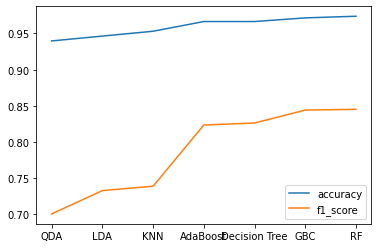

In [374]:
ax = performances.plot()

We clearly see here that the random forest model has the best accuracy and f1 score, that is why we choose it for our API.

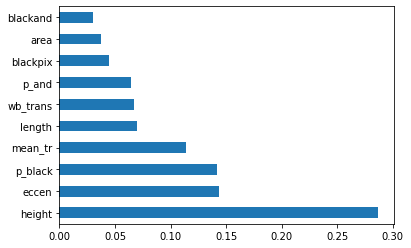

In [363]:
#Feature Importance from the best algorithm randomforestclassifier
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importances.nlargest(16).plot(kind="barh")
plt.show()

From the RandomForestClassifier we can see that the most important factors to determine the target variable are the height and the eccentricity